<div class="alert alert-info text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>Tarea semanal 6: Filtro Pasa-altos </h1></center>

<h3> Teoría de circuitos 2 </h3>
<h3> 2023 </h3>
<h3> Facundo N. Iglesias </h3>

    
</div>

## Consigna:
<img src="./rsc/consigna.png"  /> 

In [65]:
#LIbrerias utilizadas
from IPython.display import IFrame, display, Math
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from numpy import sqrt
import numpy as np
import matplotlib.pyplot as plt
from pytc2.general import Chebyshev_polynomials 
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
import scipy.signal as sig
from sympy.abc import s

<div class="alert alert-info text-left">
<center> <h1>Diseño del Filtro </h1></center>
</div>

### Especificaciones del filtro:

* Tipo: Pasa-Altos
* Caracteristica de módulo: Máxima planicidad en la banda de paso.
* Frecuencia de corte: 300 Hz.
* Cero de transmisión en 100 Hz.
* Atenuación máxima en banda de paso: No especifica.
* Atenuación mínima en banda de paso: No especifica.

### Obtención del orden "n" del filtro

Como no se especifica atenuación máxima en la banda de paso se adopta para facilitar los cálculos:

\begin{equation}
\alpha_{max}= 3 dB \rightarrow Aproximación\space de\space Butterworth \rightarrow \epsilon=1
\end{equation}

Como tampoco se especifica atenuación mínima en la banda suprimida, pero según la respuesta del pasa-bajos prototipo normalizado indicado en la consigna, la atenuación debe ser de al menos:
\begin{equation}
\alpha_{min} = 40dB \space\space en \space\space \omega_0 =  10\frac{rad}{s}
\end{equation}

por lo tanto:
\begin{equation}
\alpha_{dB}|_{n=3} = 10*log(1+10⁶) = 60 dB > 40dB 
\end{equation}

el orden debe ser:
\begin{equation}
\boxed{n=3}
\end{equation}



### Plantilla del prototipo pasa-bajos normalizado
<img src="./rsc/plantillaLP.png"  /> 
\begin{equation}
\Omega_\omega = 1
\end{equation}

### Plantilla del prototipo pasa-altos normalizado
<img src="./rsc/plantillaHP.png"  /> 
\begin{equation}
\Omega_\omega = \frac{1}{3}
\end{equation}


### Normalización de Butterworth

\begin{equation}
\omega_B = 2\pi f_c\epsilon^{\frac{1}{3}}
\end{equation}

\begin{equation}
\boxed{\omega_B = 2\pi 300 \frac{rad}{s}}
\end{equation}



<div class="alert alert-info text-left">
<center> <h1>Función transferencia normalizada del prototipo pasa-bajos</h1></center>
</div>


\begin{equation}
T(s) = \frac{1}{9} \frac{s²+9}{s³+a_1s²+a_2s+1}
\end{equation}

1) El denominador de la función transferencia corresponde al polinomio de orden 3 de un filtro de Butterworth, como se puede observar a continuación (extracto tabla 6.2 Schaumann R. Van Valkenburg M E. - Design of Analog Filters)
<img src="./rsc/tablaButter.png"  /> 
De la tabla se extrae el valor de los coeficientes:
\begin{equation}
a_1 = a_2 = 2
\end{equation}


2) Cumpliendo con la consigna se agregó en el númerador un cero de transmisión en la frecuencia normalizada de 3 rad/s.
\begin{equation}
s²+9
\end{equation}

3) Se agregó en la transferencia una ganancia para mantener el nivel de la función transferencia en 0dB en la banda de paso como indica la respuesta del pasa-bajos en la consigna
\begin{equation}
K = \frac{1}{9}
\end{equation}

Finalmente la expresión de la función transferencia del filtro pasa-bajos prototipo es la siguiente:
\begin{equation}
\boxed{T(s) = \frac{1}{9} \frac{s²+9}{s³+2s²+2s+1}}
\end{equation}

### Respuesta del filtro pasa-bajos prototipo normalizado

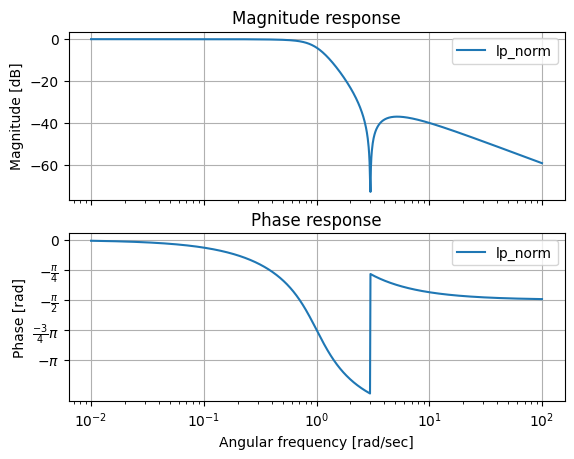

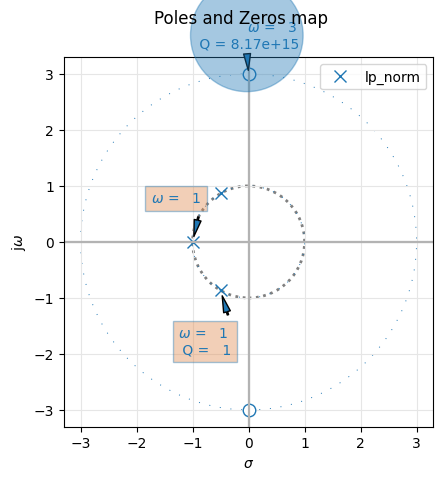

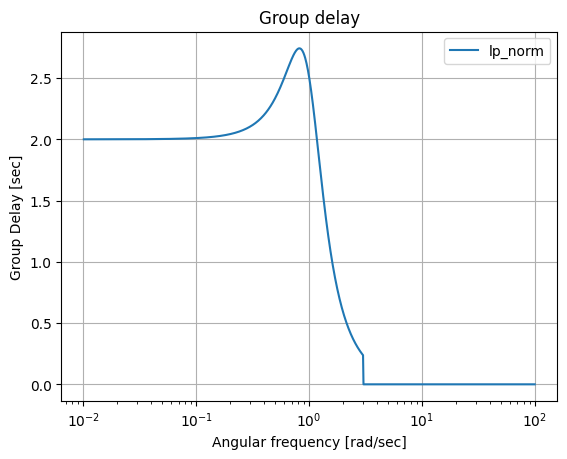

In [63]:
analyze_sys([sig.TransferFunction([1/9,0,1], [1,2,2,1])], ['lp_norm'])

1) En la respuesta de módulo se puede apreciar la forma correspondiente a un Notch pasa-bajos y se observa que cumple correctamente con la consigna.

2) En la respuesta de fase se puede observar que comienza en 0, lo cual es razonable ya que el polo en 1 tiene una fase inicial de 0 y a su vez la simetría axial de los polos complejos conjugados produce una cancelación entre los aportes de fase de cada singularidad. Por otro lado cuando la frecuencia comienza a aumentar los 3 polos aportan una fase de -90°, por lo tanto la fase en infinito debería ser de -270° pero no es así ya que el aporte positivo de los ceros no deja que llegue a este valor debido a su proximidad con los polos y logran que finalmente la fase se estabilice en -90. 
Analizando el diagrama de polos también se puede deducir la función transferencia:
\begin{equation}
T(s) = \frac{1}{9} \frac{s²+9}{(s+1)(s²+as+1)}
\end{equation}

\begin{equation}
a = 2cos\varphi = 2cos(\frac{\pi}{3}) = 1
\end{equation}

\begin{equation}
\boxed{T(s) = \frac{1}{9} \frac{s²+9}{(s+1)(s²+s+1)}}
\end{equation}

3. En el diagrama de polos y ceros se destaca que los ceros de la transferencia que normalmente están en el infinito se movieron a w=3 para generar el cero de transmisión solicitado.
4. En el gráfico del retardo de grupo se observa que el mismo se anula luego del cero de transmisión debido a que la pendiente de la fase a partir de este punto es constante.

<div class="alert alert-info text-left">
<center> <h1>Función transferencia del filtro pasa-altos normalizado</h1></center>
</div>

Empleando el nucleo del pasa-altos se realiza una transformación en frecuencia
\begin{equation}
\omega_{LP} = \frac{1}{\omega_{HP}}
\end{equation}

\begin{equation}
\boxed{T(s) = \frac{s}{s+1} \frac{s²+\frac{1}{9}}{s²+s+1}}
\end{equation}


### Respuesta del filtro pasa-altos prototipo normalizado

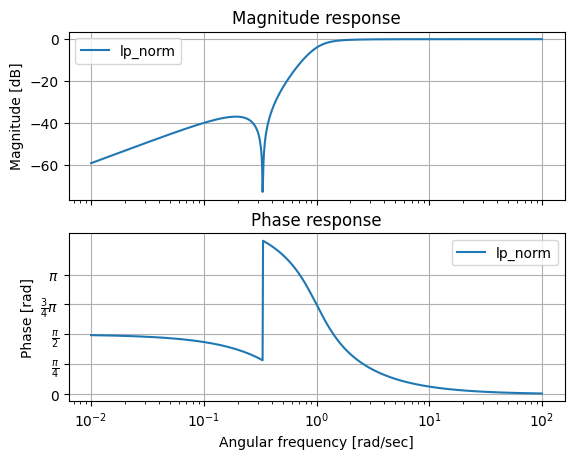

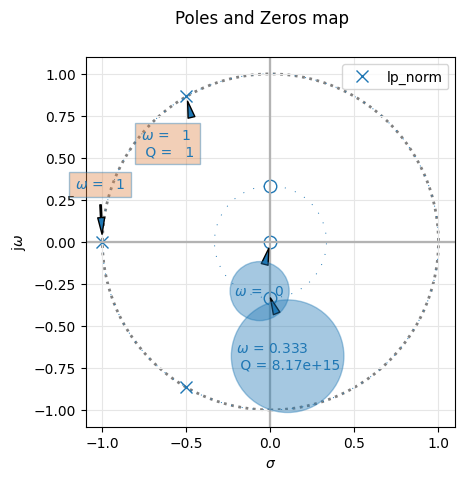

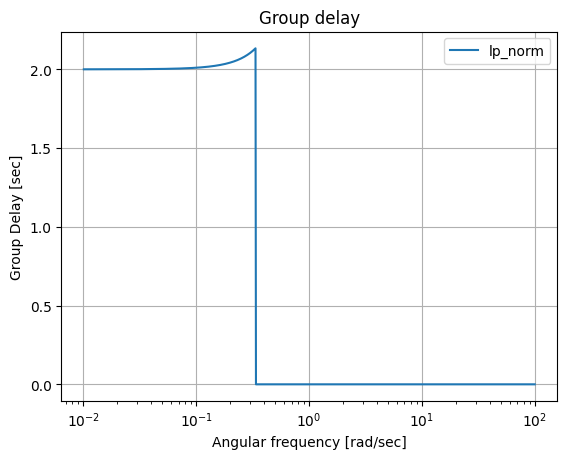

In [64]:
analyze_sys([sig.TransferFunction([1,0,1/9,0], [1,2,2,1])], ['lp_norm'])

1. Se observa en la respuesta de modulo del filtro pasa-altos la frecuencia de corte en w=1 y que luego de la transformación el cero se movió a w=1/3.
2. La fase poseé una respuesta inversa a la del pasa-bajos con valores positivos ya que ahora la circunferencia sobre la que están posicionados los polos, la cual continúa siendo unitaria, ahora contiene a la circunferencia de los ceros. También se observan las singularidades del bloque de primer orden: la presencia del cero en el origen que aporta la fase inicial de 90° y del polo en -1 que aporta -90° en infinito.


<div class="alert alert-info text-left">
<center> <h1>Implementación</h1></center>
</div>


### Sintesis activa del bloque de 2do Orden
Según la consigna se debe sintetizar el bloque de segundo orden utilizando el siguiente circuito:
<img src="./rsc/circuito_consigna.png"/> 
Para ello, se procede a calcular la transferencia bicuadratica que presenta el circuito

In [67]:
V1, V2, Vx, Vy = sp.symbols("V1, V2, Vx, Vy")
Y1, Y2, YC, Y, C, R, R1, R2 = sp.symbols("Y1, Y2, YC, Y, C, R, R1, R2")

sistema = sp.solve([ 
                ((V2*YC+V1*Y)/(YC+Y))*(YC+Y1+Y2)-V1*YC-Vy*Y2,
                ((V2*YC+V1*Y)/(YC+Y))*2*Y-Vy*Y-V2*Y,
            ], 
            [V1, V2])

transf_func = sistema[V2]/sistema[V1]
transf_func = sp.simplify(transf_func) 

tf2orden = transf_func.subs(Y1,1/R1)
tf2orden = tf1orden.subs(Y2,1/R2)
tf2orden = tf1orden.subs(Y,1/R)
tf2orden = tf1orden.subs(YC,s*C)
tf2orden

(C**2*s**2 + 1/(R*R2) - 1/(R*R1))/(C**2*s**2 + C*s/R1 + 1/(R*R2))

De la transferencia calculada anteriormente se deducen los componentes de los que dependen los parámetros carácteristicos del filtro
Frecuencia del cero de transmisión:
\begin{equation}
\omega_z = \frac{R}{C²}(\frac{1}{R_2} - \frac{1}{R_1})
\end{equation}

Frecuencia de corte del filtro:
\begin{equation}
\omega_o = \frac{1}{RR_2C²}
\end{equation}

Factor de calidad del filtro (Q):
\begin{equation}
\frac{\omega_0}{Q} = \frac{1}{R_1C}
\end{equation}

A partir de los grados de libertad definidos se adopta:
\begin{equation}
\boxed{C = 1F} \rightarrow \boxed{R_1 = 1\Omega}
\end{equation}

por lo tanto,
\begin{equation}
R_2 = \frac{1}{R} \space\space\space\space y\space\space\space\space \frac{1}{R_2}-\frac{1}{R} = \frac{1}{9}
\end{equation}

despejando:
\begin{equation}
\boxed{R = 1,125\Omega} 
\end{equation}
\begin{equation}
\boxed{R_2 = 0,889\Omega} 
\end{equation}




### Desnormalización en frecuencia

\begin{equation}
C = \frac{C_N}{\Omega_\omega}
\end{equation}

\begin{equation}
C = \frac{1F}{2 \pi 300 Hz} \rightarrow \boxed{C=530,51uF}
\end{equation}


<div class="alert alert-info text-left">
<center> <h1>Simulación circuital</h1></center>
</div>

Circuito completo con bloques de primer y segundo orden aislados por buffer:
<img src="./rsc/sim/circuito.png"/> 

<img src="./rsc/sim/sim1.png"/> 
En la captura anterior se observa la máxima planicidad que el filtro presenta en la banda de paso y como decae el modulo debido al cero de transmisión situado en la frecuencia de 100 Hz, asi como tambien se aprecia como la fase transiciona de forma abrupta en este punto.

<img src="./rsc/sim/sim2.png"/> 
En esta imagen se puede ver la caída de 3dB del modulo de la transferencia que se da en la frecuencia de corte del filtro. Se observa una leve diferencia de 16 mHz con respecto a la frecuencia de corte teórica de 300 Hz, también se observa una leve atenuación en la banda de paso ya que no resultó de exactamente 0 dB.

<div class="alert alert-info text-left">
<center> <h1>Alternativa de implementación de Shaumann</h1></center>
</div>

Como alternativa para sintetizar el bloque de 2do orden Schaumann propone el siguiente circuito:
<img src="./rsc/circuito_Shaumann.png"/> 

el cual presenta la siguiente transferencia:
<img src="./rsc/transf_Schaumann.png"/> 

En primer lugar se observa que con el circuito de Schaumann basado en el GIC se puede construir la bicuadratica completa, lo que permite diseñar cualquier tipo de filtro con ceros de transmisión en cualquier parte del plano s. El circuito empleado en este trabajo práctico genera una bicuadrática sin termino lineal, lo que imposibilita la implementación de un filtro pasa-banda,pasa-todo o Notch.
Otra ventaja del circuito propuesto por Shaumann es que, en el caso de haberse aplicado para este trabajo, permitiria controlar la ganancia en baja frecuencia del filtro pasa-altos Notch ajustando "a" y la ganancia en alta frecuencia ajustando "2a-c". 

<div class="alert alert-info text-left">
<center> <h1>Resolución manual</h1></center>
</div>

In [71]:
IFrame("./rsc/resolucion.pdf", width=1000, height=1000)

---------------------------------------------------------------------------------------------------